In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
my_dpi=96

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url =  'https://api.covid19india.org/csv/latest/state_wise_daily.csv'
fdata = pd.read_csv(url)
scaler = MinMaxScaler()
statelist = list(fdata.columns)[2:]
fdata
stdict = {'an': 'AN', 'andaman and nicobar': 'AN', 'andhra pradesh': 'AP', 'andhrapradesh': 'AP', 'andra pradesh': 'AP', 'andrapradesh': 'AP', 'ap': 'AP', 'ar': 'AR', 'arunachal pradesh': 'AR', 'as': 'AS', 'assam': 'AS', 'bengal': 'WB', 'bihar': 'BR', 'br': 'BR', 'cg': 'CG', 'ch': 'CH', 'chandigarh': 'CH', 'chattisgarh': 'CG', 'dadra and nagar haveli': 'DN', 'daman and diu': 'DD', 'dd': 'DD', 'delhi': 'DL', 'dl': 'DL', 'dn': 'DN', 'ga': 'GA', 'gj': 'GJ', 'goa': 'GA', 'gujarat': 'GJ', 'haryana': 'HR', 'himachal pradesh': 'HP', 'hp': 'HP', 'hr': 'HR', 'jammu and kashmir': 'JK', 'jh': 'JH', 'jharkhand': 'JH', 'jk': 'JK', 'ka': 'KA', 'karnataka': 'KA', 'karnatka': 'KA', 'kerala': 'KL', 'kl': 'KL', 'lakshadweep': 'LD', 'ld': 'LD', 'madhya pradesh': 'MP', 'maharashtra': 'MH', 'maharastra': 'MH', 'manipur': 'MN', 'meghalaya': 'ML', 'mh': 'MH', 'mizo': 'MZ', 'mizoram': 'MZ', 'ml': 'ML', 'mn': 'MN', 'mp': 'MP', 'mz': 'MZ', 'nagaland': 'NL', 'nl': 'NL', 'odisa': 'OR', 'or': 'OR', 'orisa': 'OR', 'orissa': 'OR', 'pb': 'PB', 'pondicherry': 'PY', 'punjab': 'PB', 'py': 'PY', 'rajastan': 'RJ', 'rajasthan': 'RJ', 'rj': 'RJ', 'sikkim': 'SK', 'sk': 'SK', 'tamil nadu': 'TN', 'tamilnad': 'TN', 'tamilnadu': 'TN', 'telangana': 'TG', 'tg': 'TG', 'tn': 'TN', 'tr': 'TR', 'tripura': 'TR', 'ua': 'UA', 'up': 'UP', 'uttar pradesh': 'UP', 'uttarakhand': 'UA', 'wb': 'WB', 'west bengal': 'WB', 'westbengal': 'WB'}
st2dict = {}
for i in stdict:
  if len(i)>2:
    st2dict[stdict[i]] = i
#Unknown and Special codes
st2dict['TT'] = 'Total'
st2dict['CT'] = 'chhattisgarh'
st2dict['LA'] = 'ladakh'
st2dict['UT'] = 'uttarakhand'

In [5]:
#Anomaly Detection on Confirmed cases 1 Anomaly 0 Normal
data = fdata.query('Status == \'Confirmed\'')
numdata = data[list(data.columns)[2:]]
procdata = pd.DataFrame(scaler.fit_transform(numdata))
model =  IsolationForest(contamination = 0.001)
model.fit(numdata[:100])
anodata = pd.Series(model.predict(numdata[100:]))
print(anodata.map( {1: 0, -1: 1} ).value_counts())

1    27
0     3
dtype: int64


In [6]:
#Anomaly Detection on Recovered cases 1 Anomaly 0 Normal
data = fdata.query('Status == \'Recovered\'')
numdata = data[list(data.columns)[2:]]
procdata = pd.DataFrame(scaler.fit_transform(numdata))
procdata
model =  IsolationForest(contamination = 0.001)
model.fit(numdata[:100])
anodata = pd.Series(model.predict(numdata[100:]))
print(anodata.map( {1: 0, -1: 1}).value_counts())

1    28
0     2
dtype: int64


In [7]:
#Anomaly Detection on Deceased cases 1 Anomaly 0 Normal
data = fdata.query('Status == \'Deceased\'')
numdata = data[list(data.columns)[2:]]
procdata = pd.DataFrame(scaler.fit_transform(numdata))
procdata
model =  IsolationForest(contamination = 0.00001)
model.fit(numdata[:100])
anodata = pd.Series(model.predict(numdata[100:]))
print(anodata.map( {1: 0, -1: 1}).value_counts())

1    18
0    12
dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

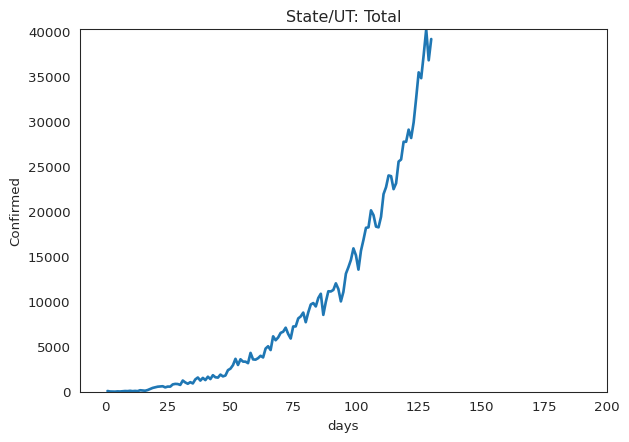

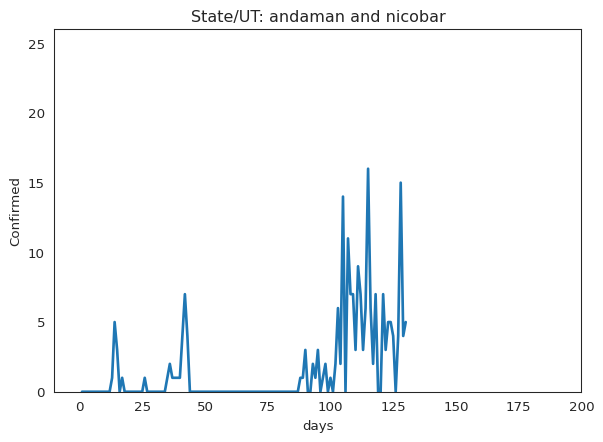

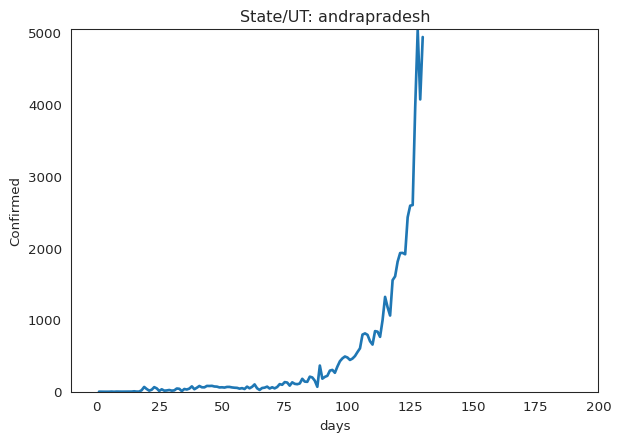

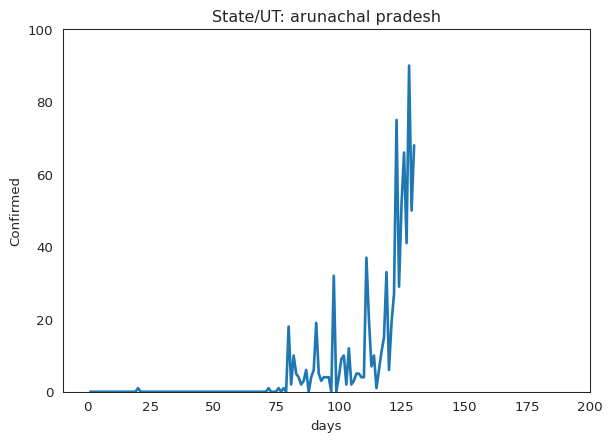

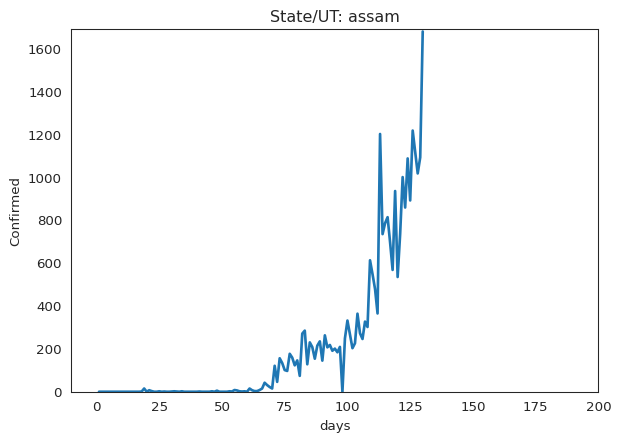

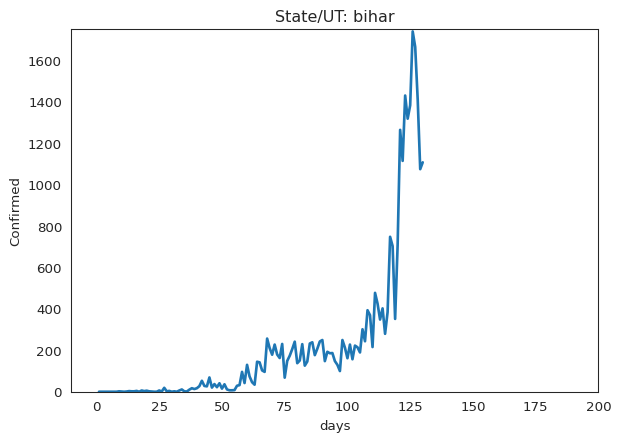

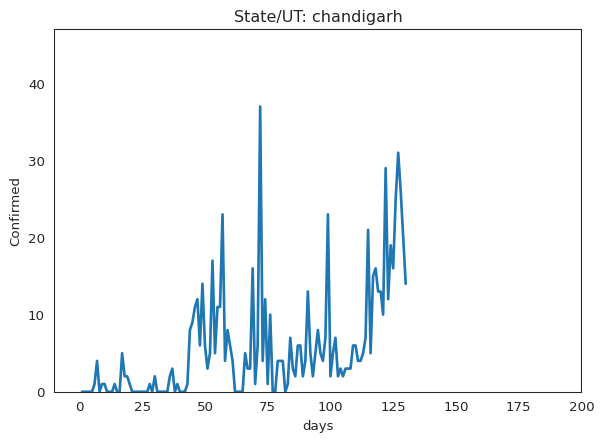

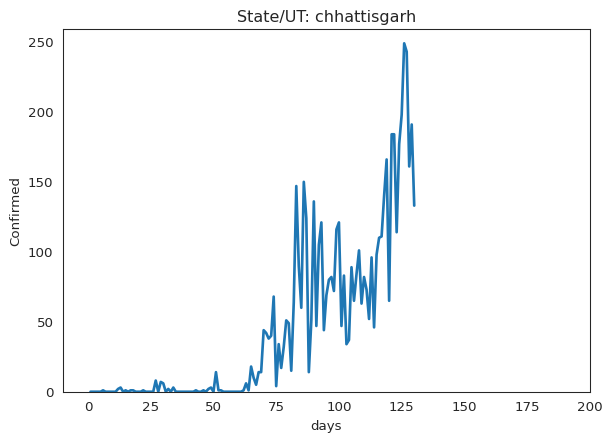

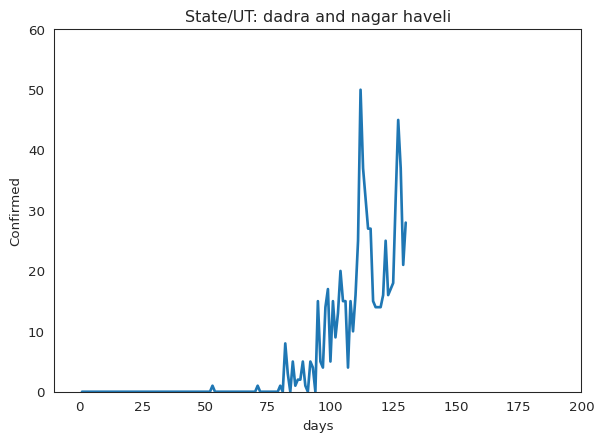

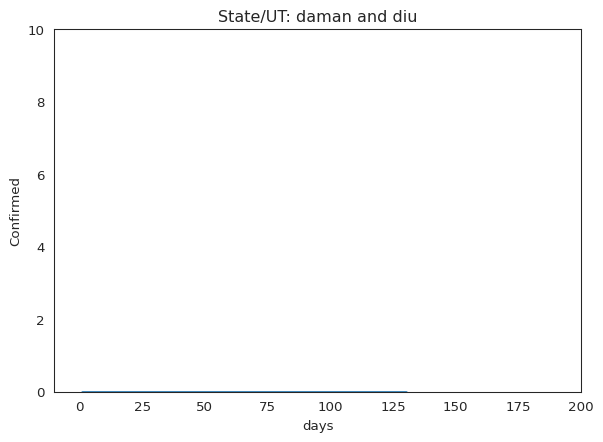

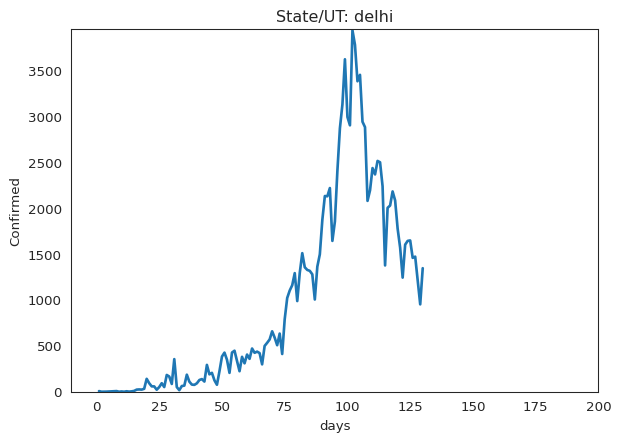

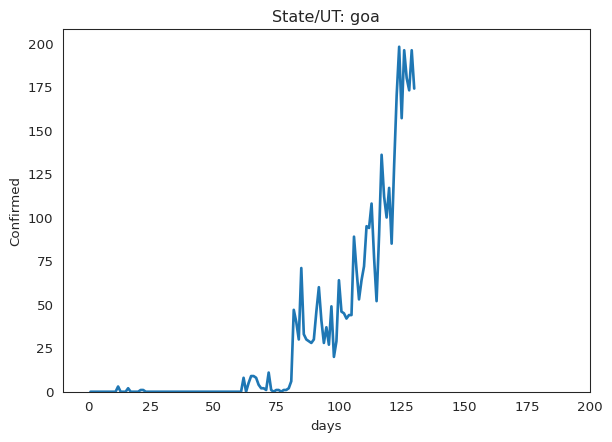

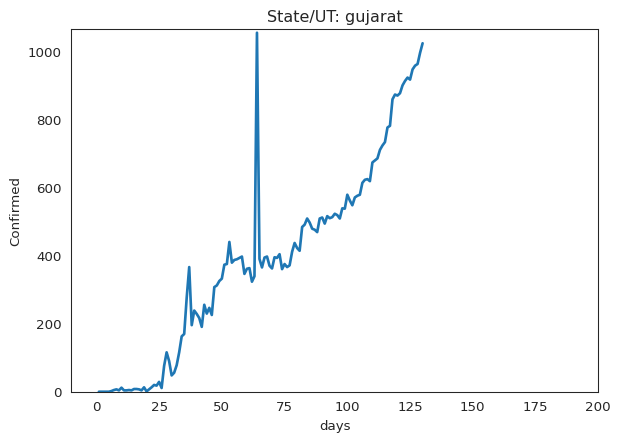

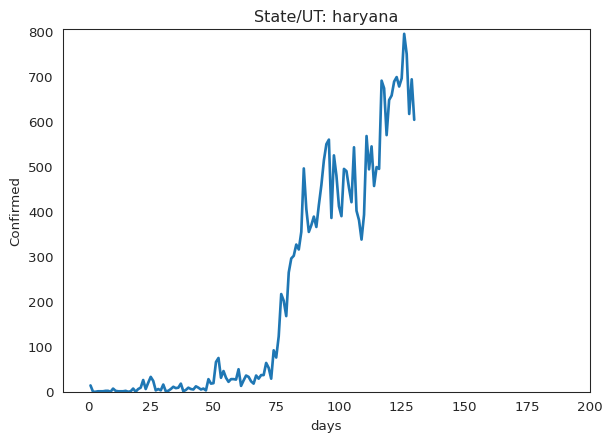

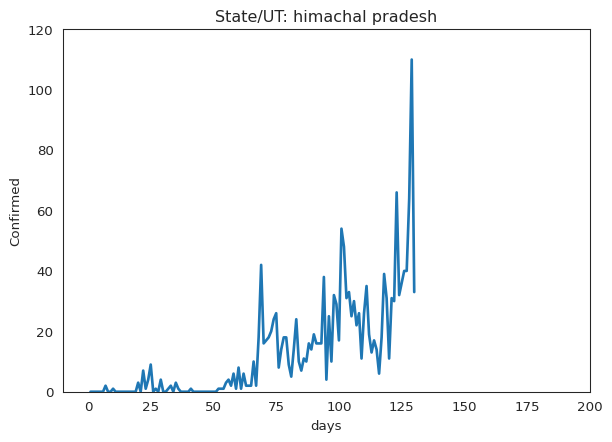

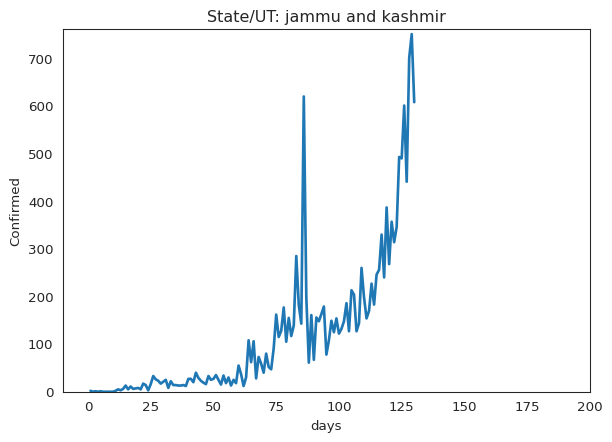

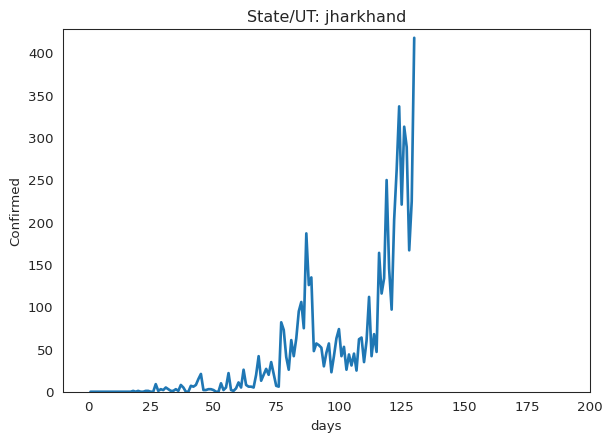

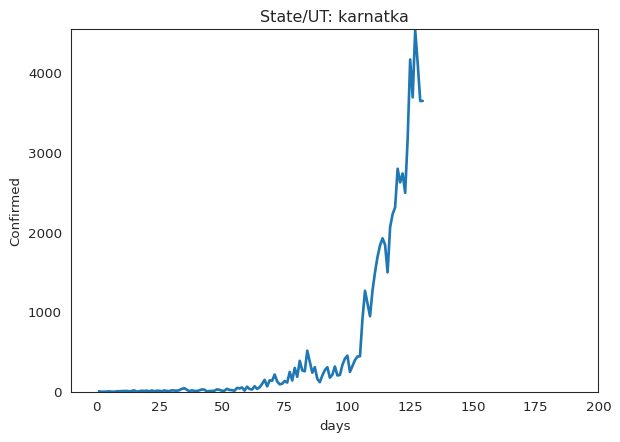

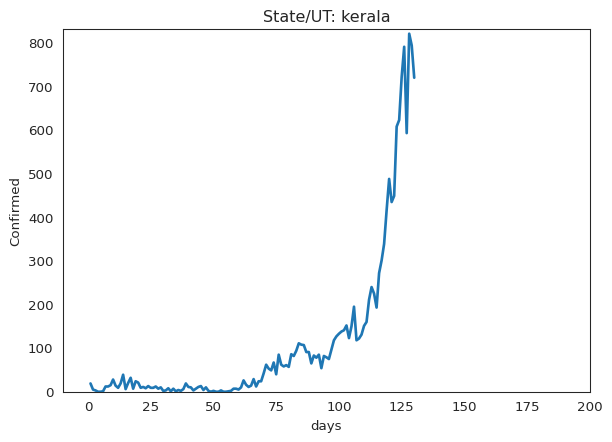

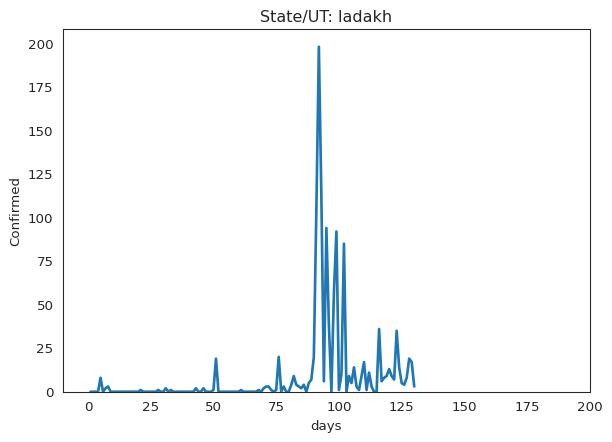

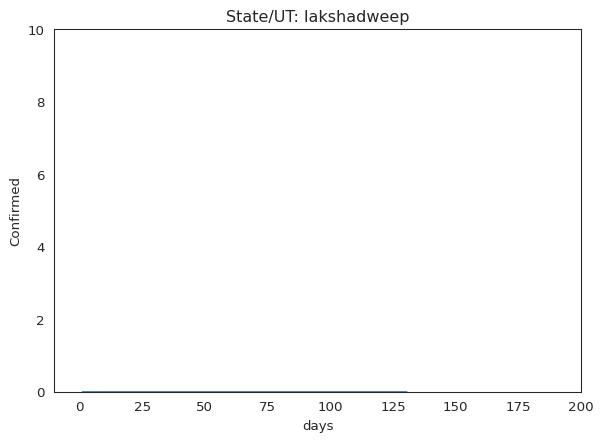

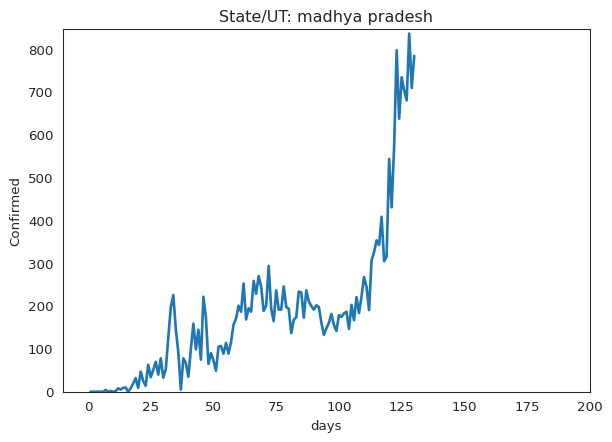

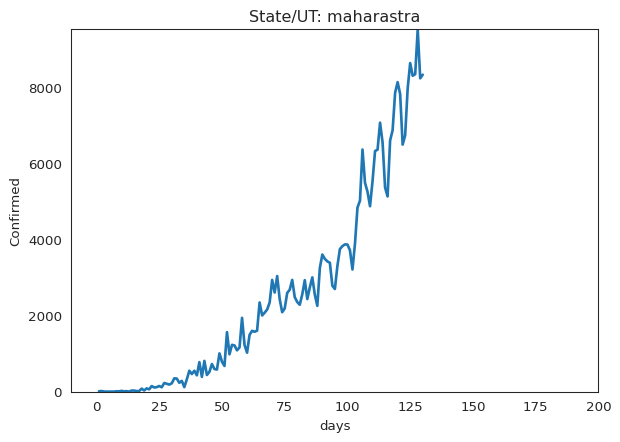

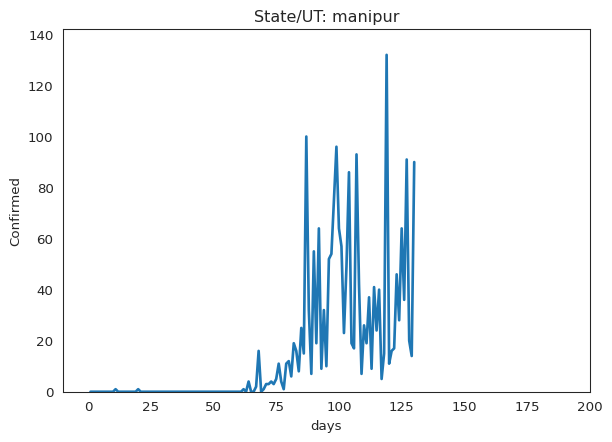

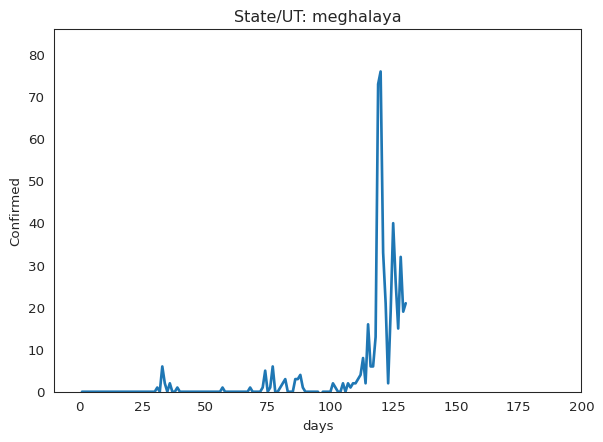

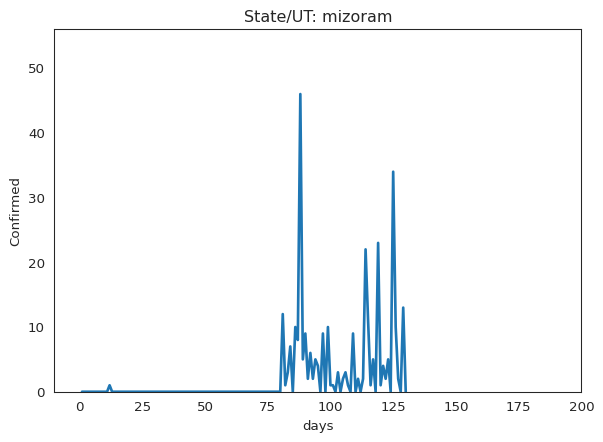

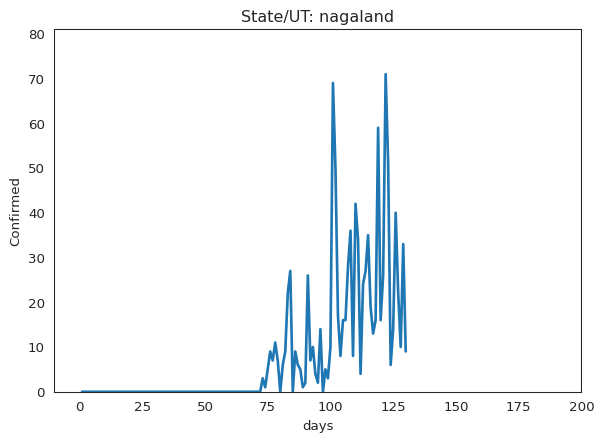

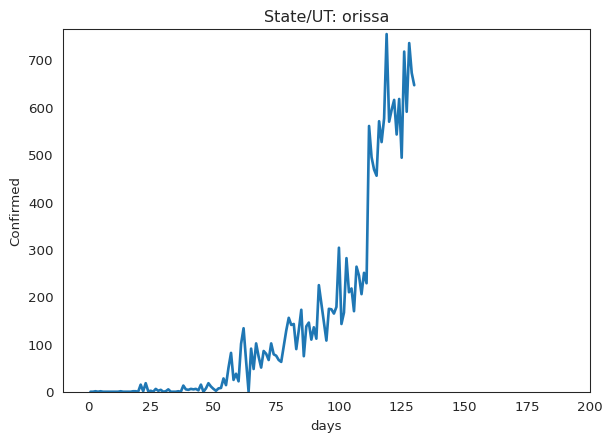

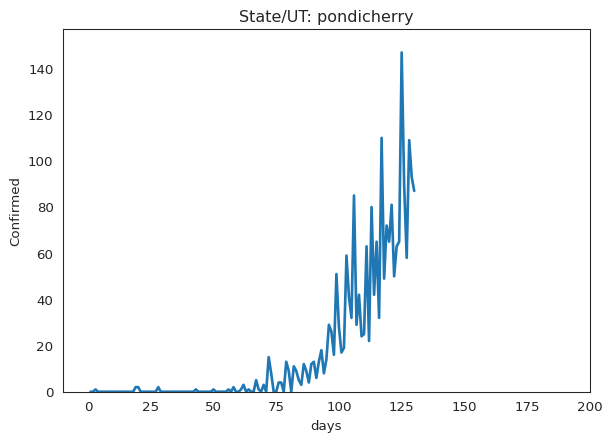

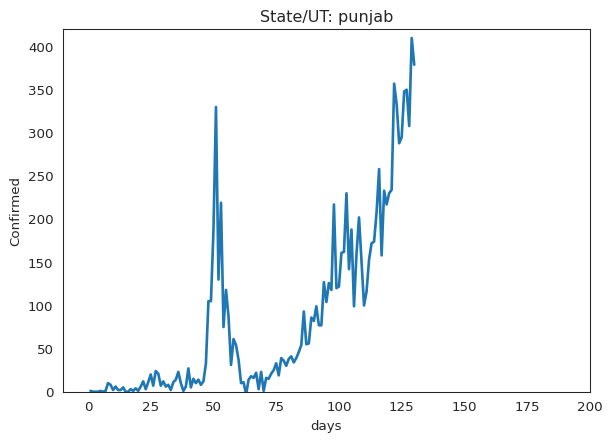

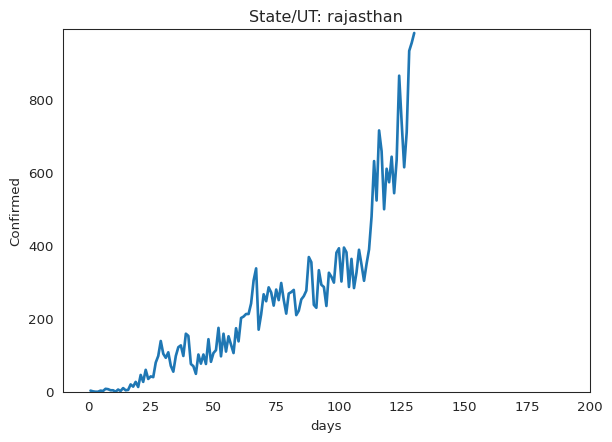

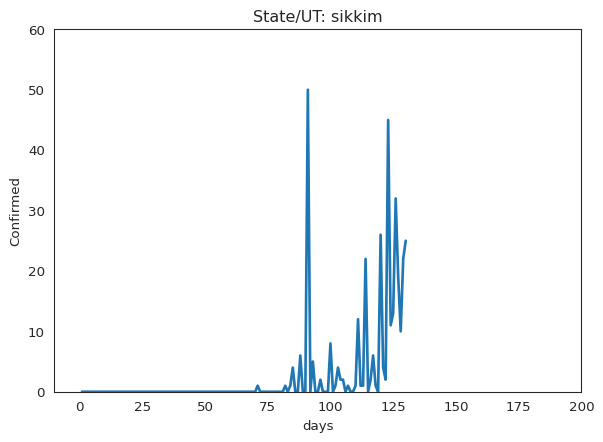

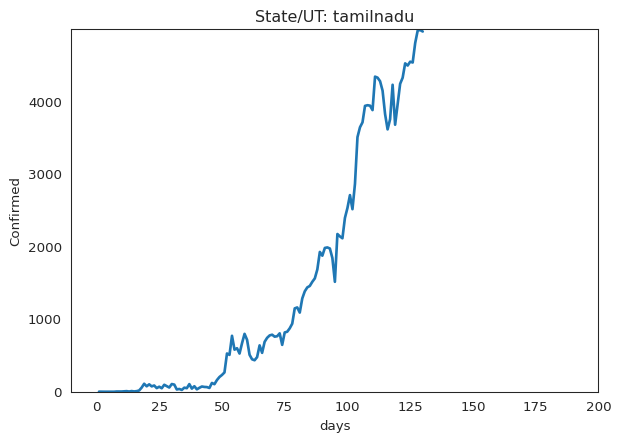

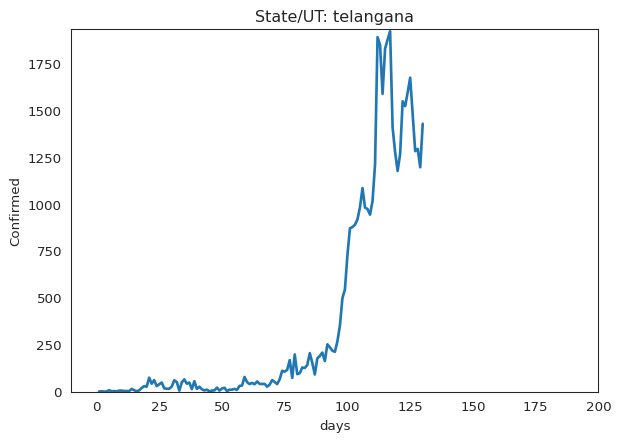

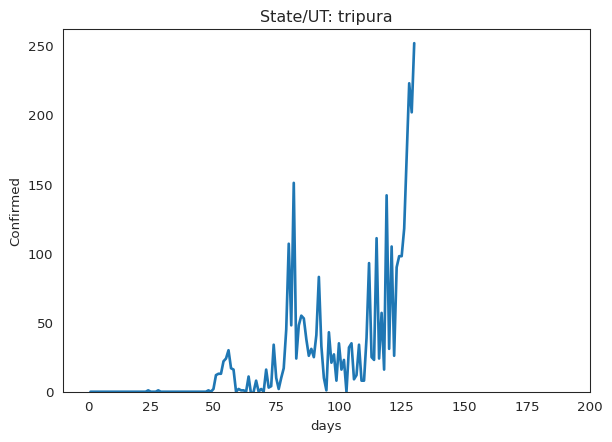

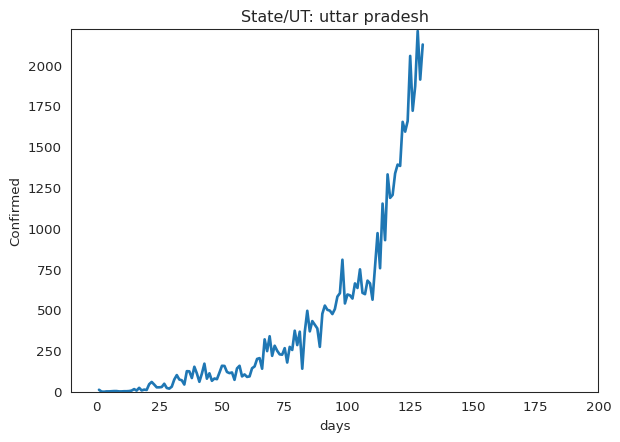

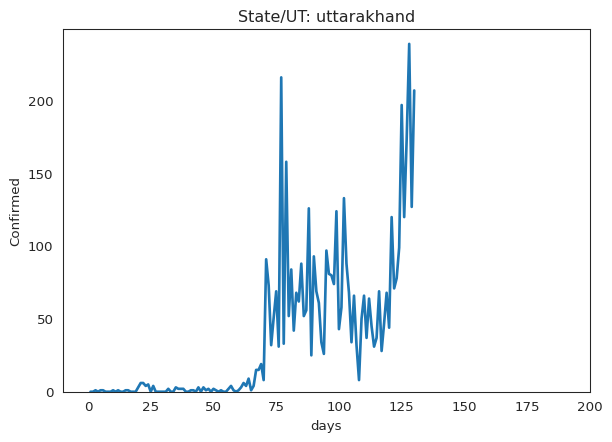

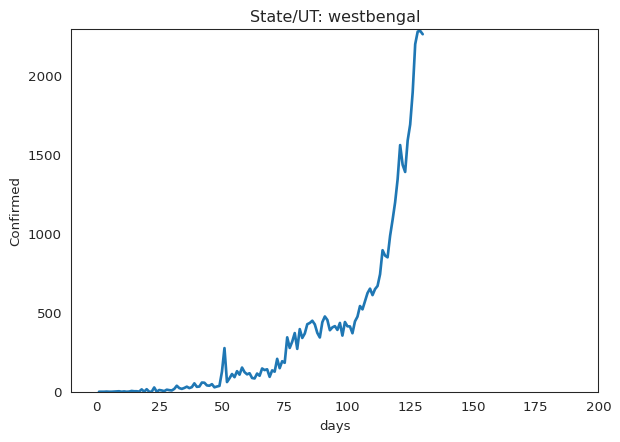

In [8]:
#Trend of Confirmed Cases over the states/UT and India
data = fdata.query('Status == \'Confirmed\'')
for i in statelist:
  if i=='UN':
    continue
  fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

  plt.plot(list(range(1,131)), data[i] ,  linewidth=2)
  y = max(data[i])


  
  plt.xlabel("days")
  plt.ylabel("Confirmed")
  plt.title("State/UT: "+ st2dict[i] )
  plt.ylim(0,y + 10)
  plt.xlim(-10, 200)


  filename='Confirmed'+str(i)+'.png'
  plt.savefig(filename, dpi=48)
  plt.gca()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

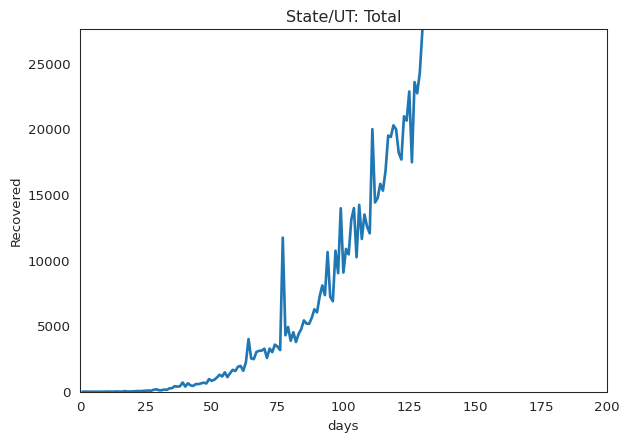

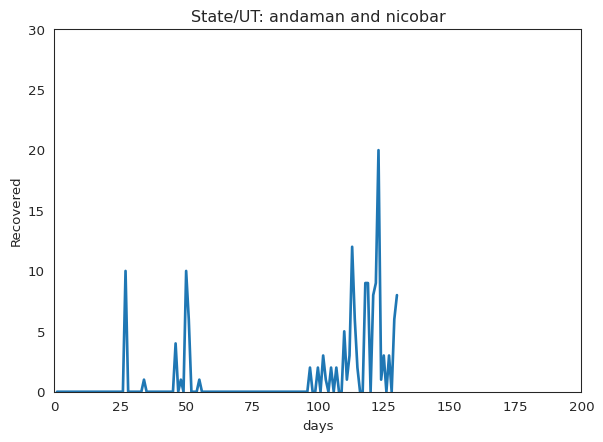

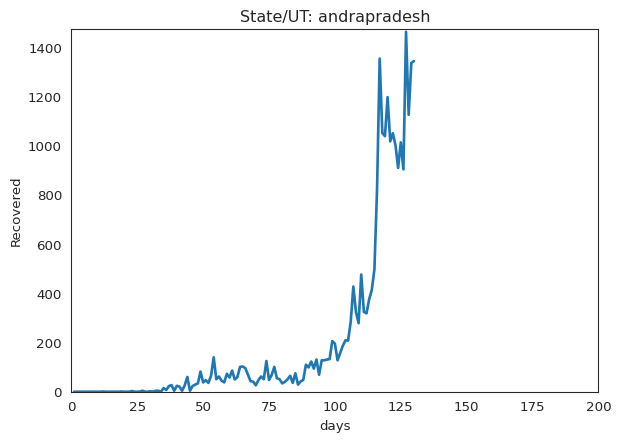

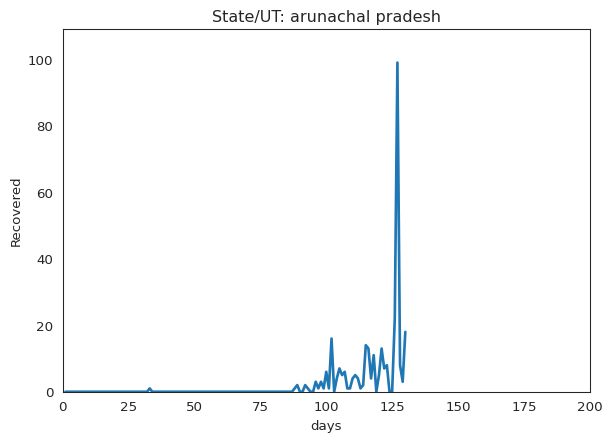

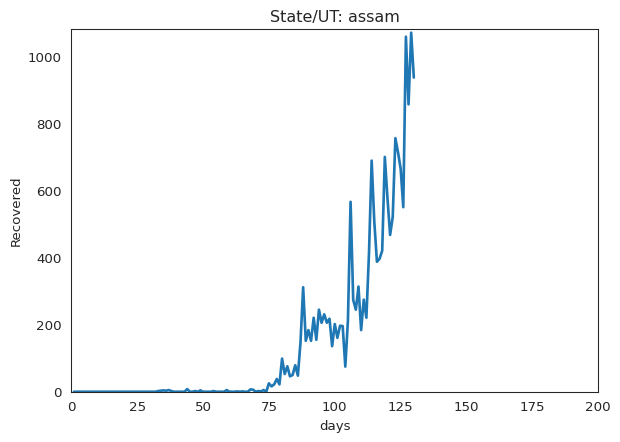

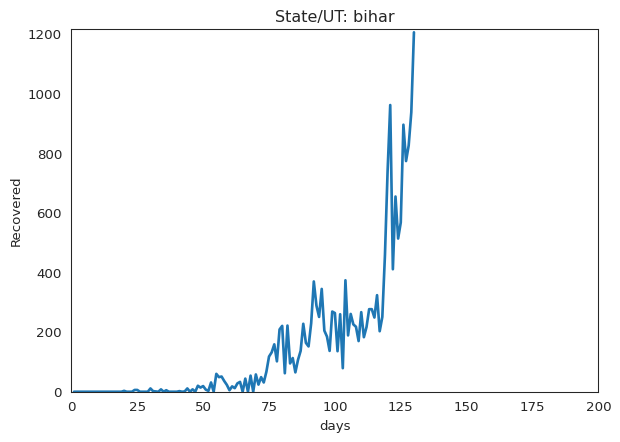

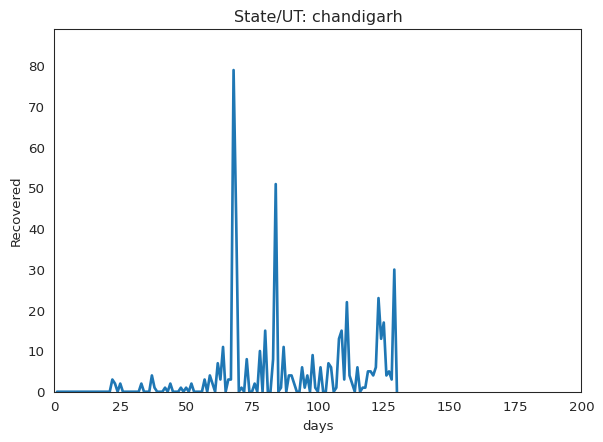

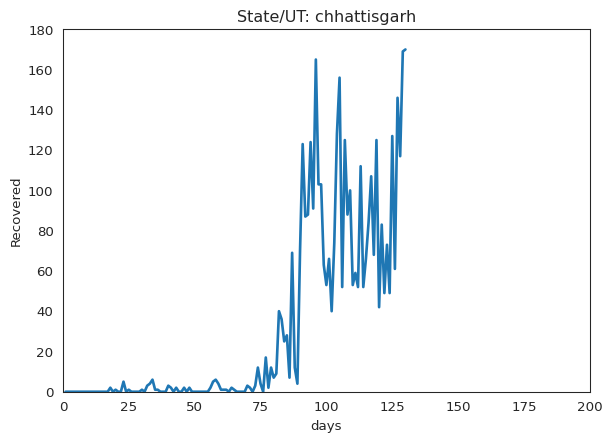

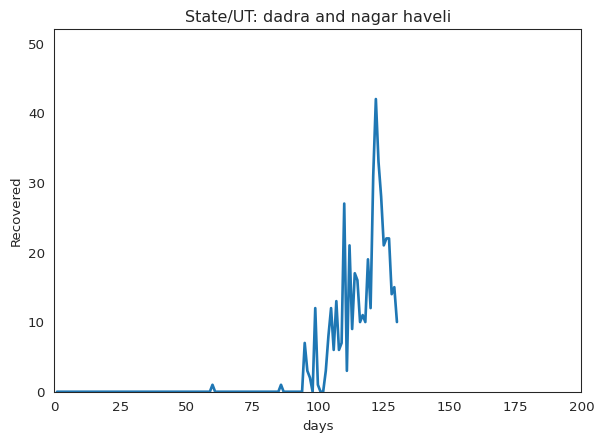

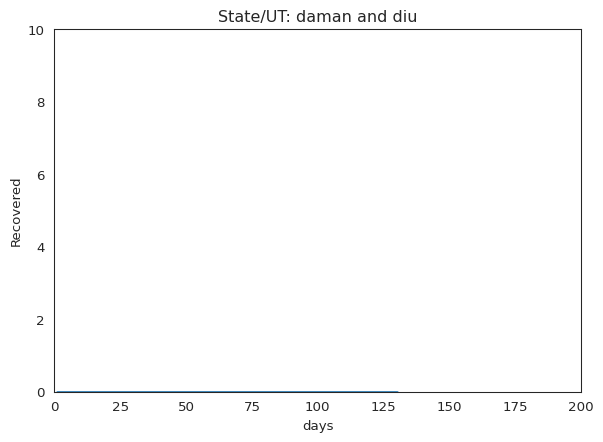

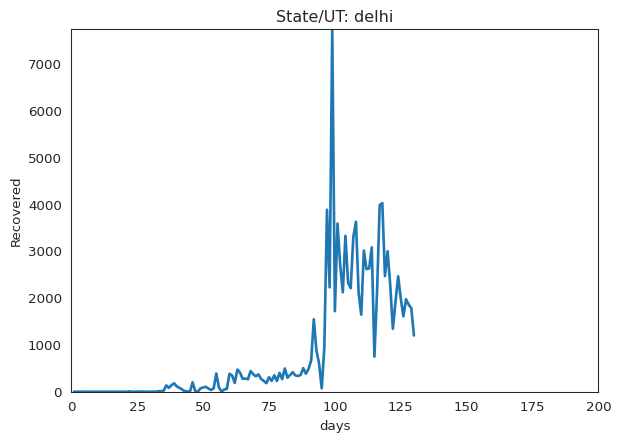

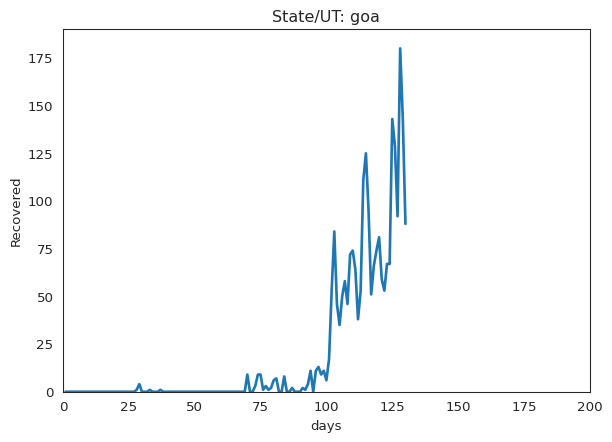

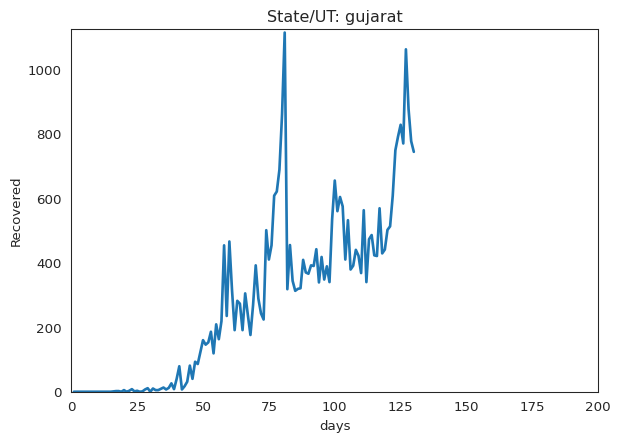

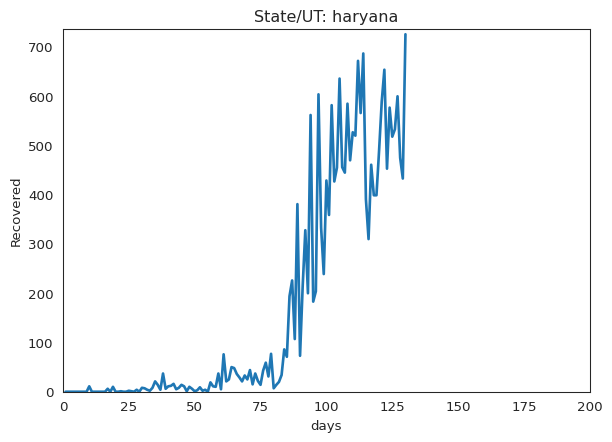

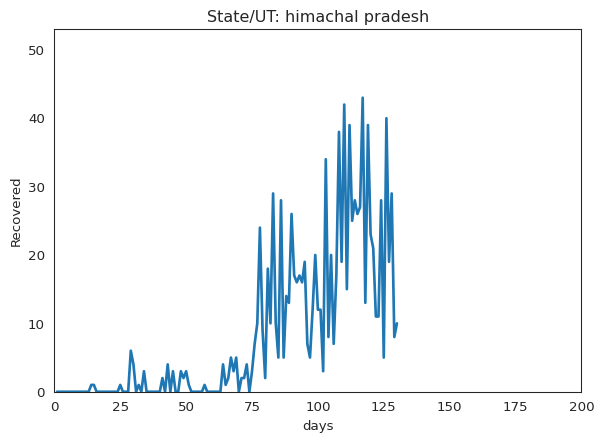

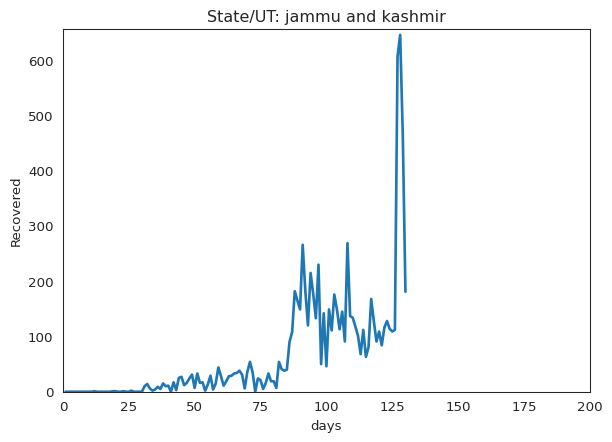

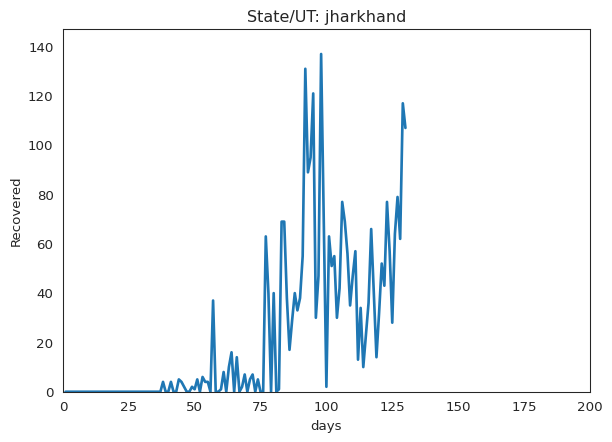

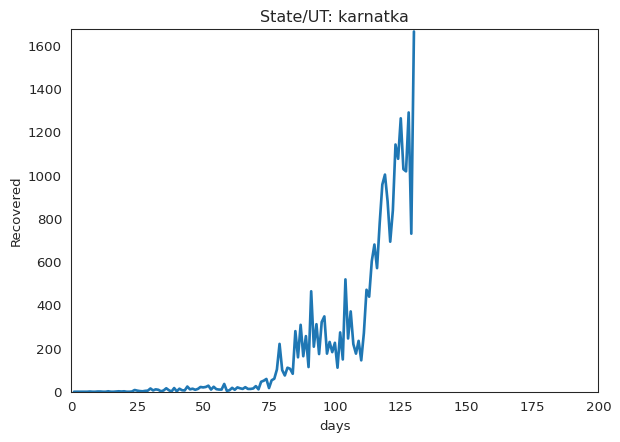

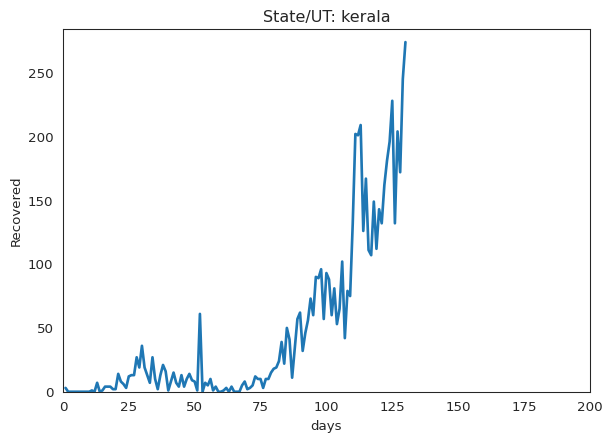

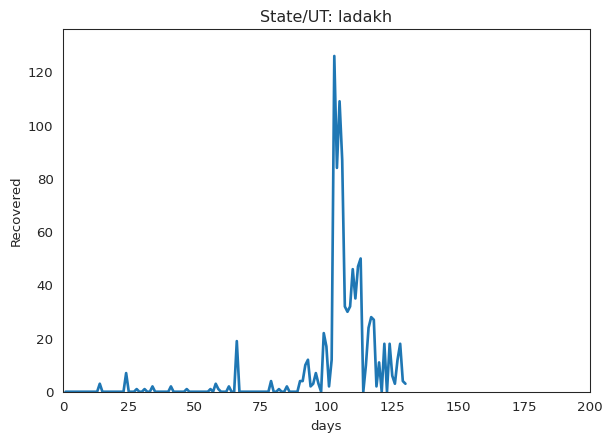

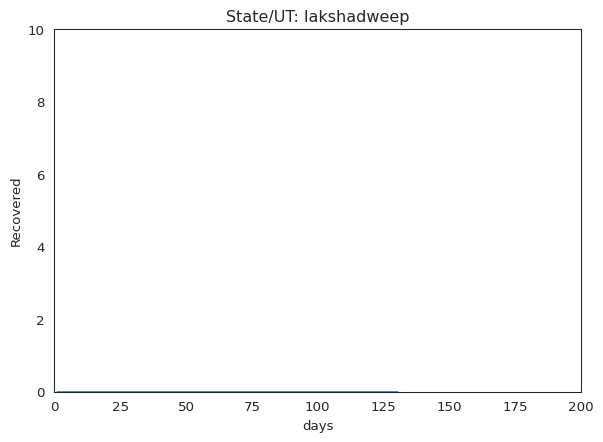

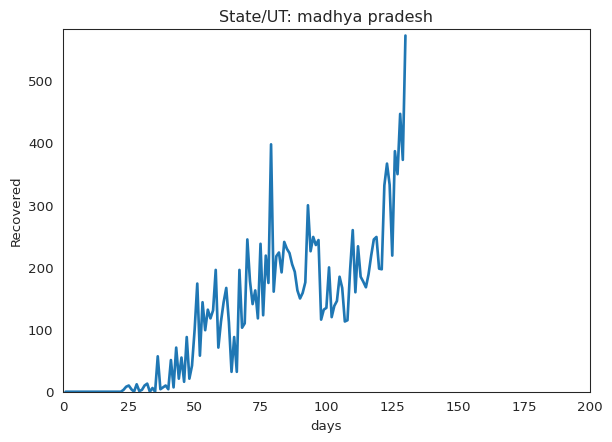

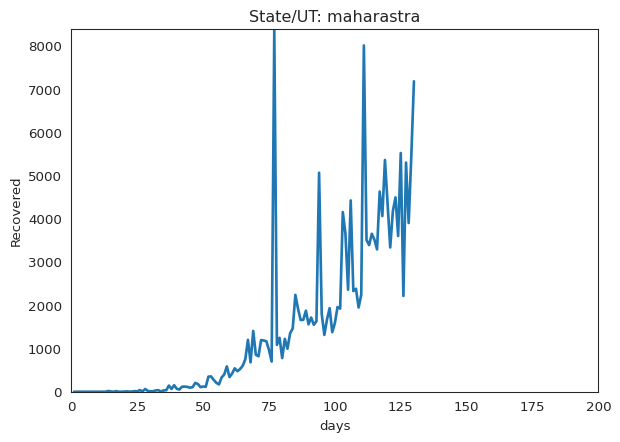

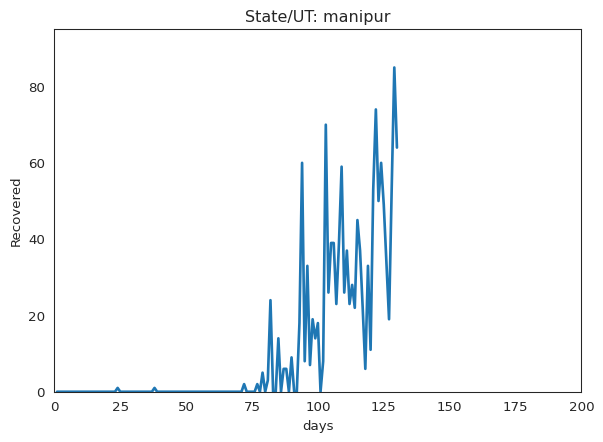

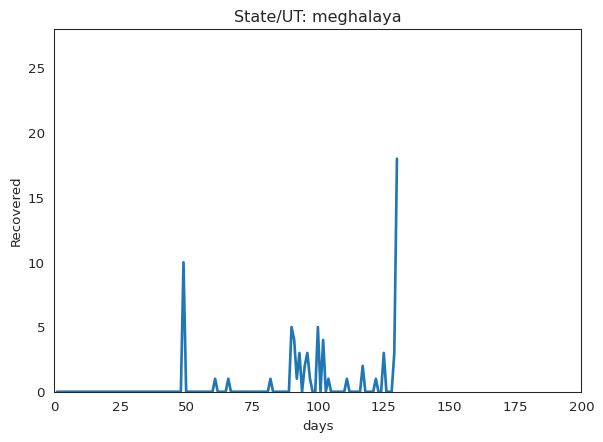

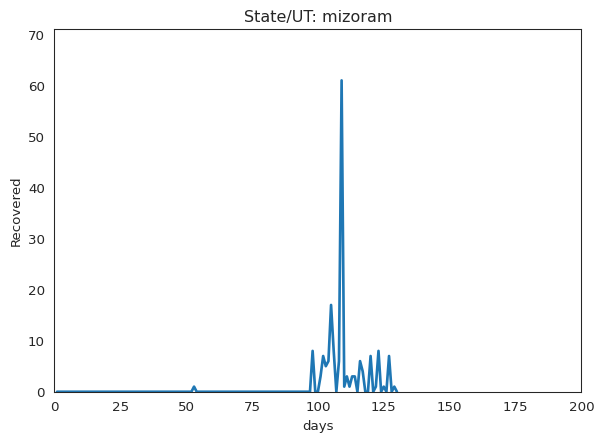

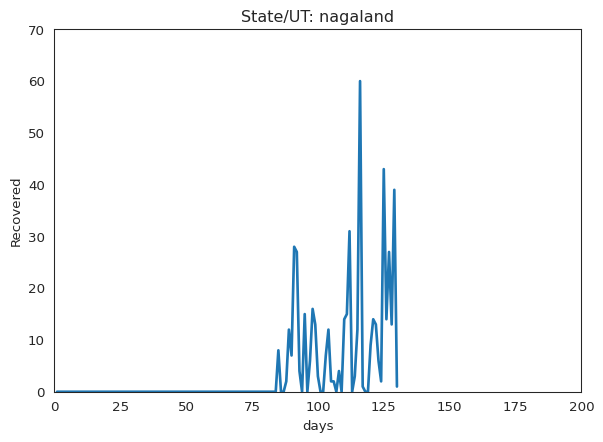

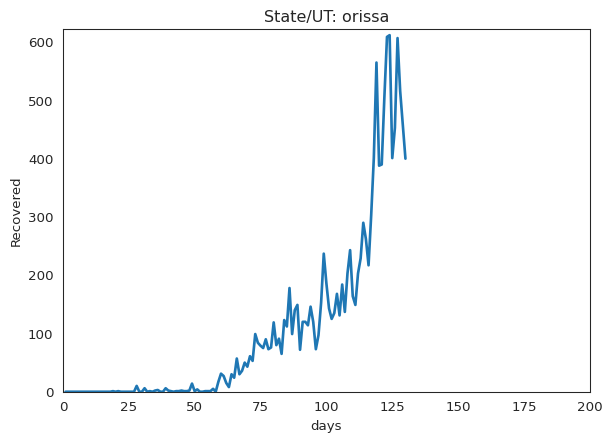

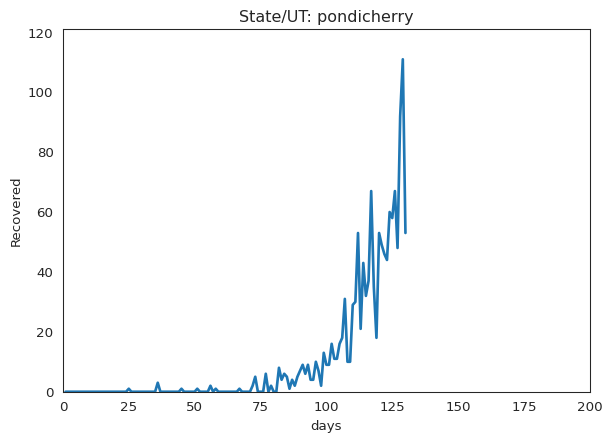

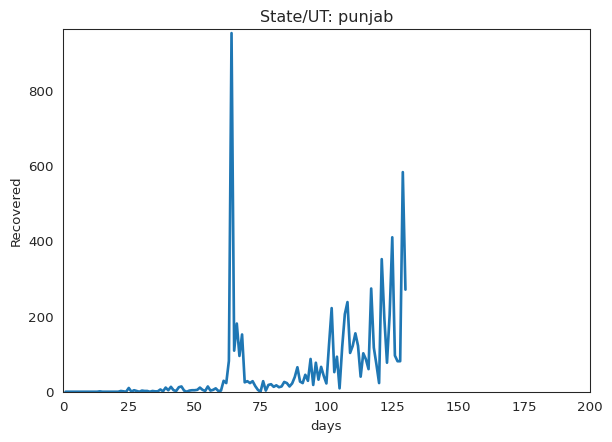

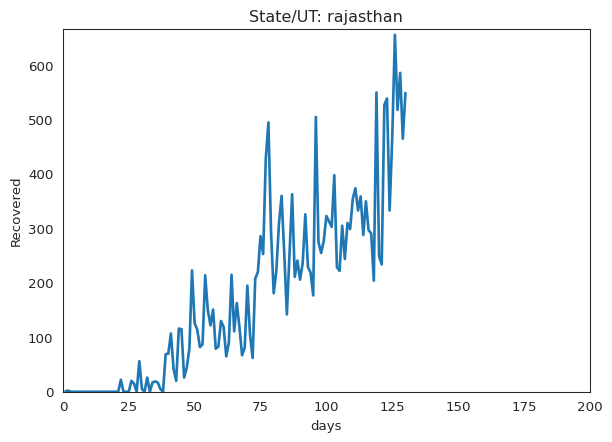

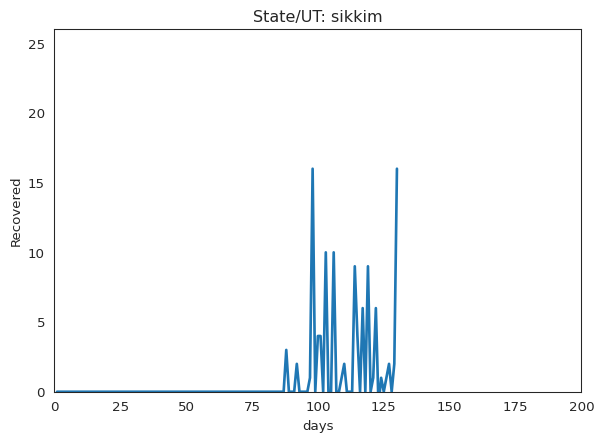

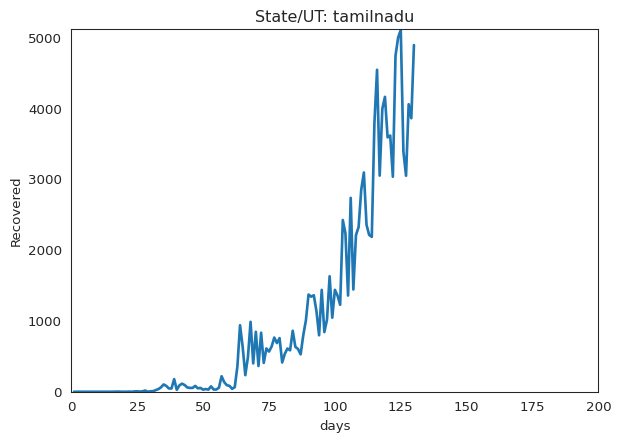

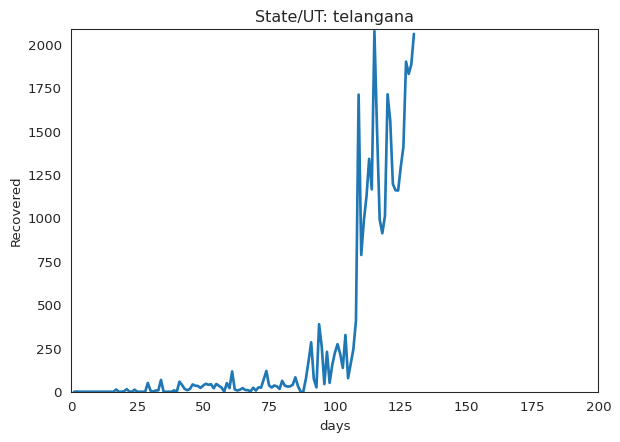

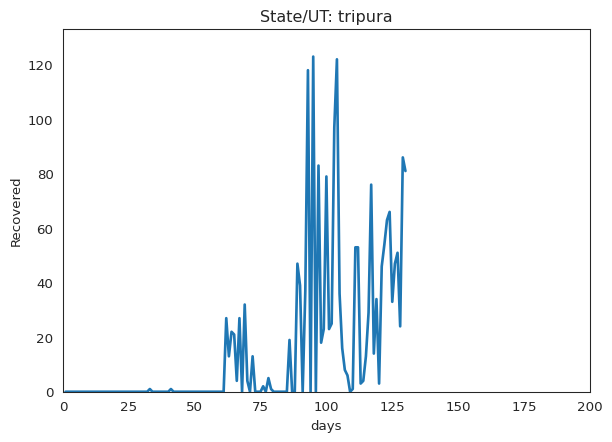

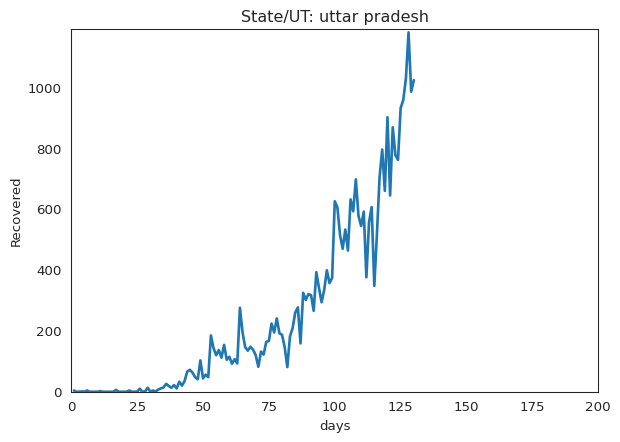

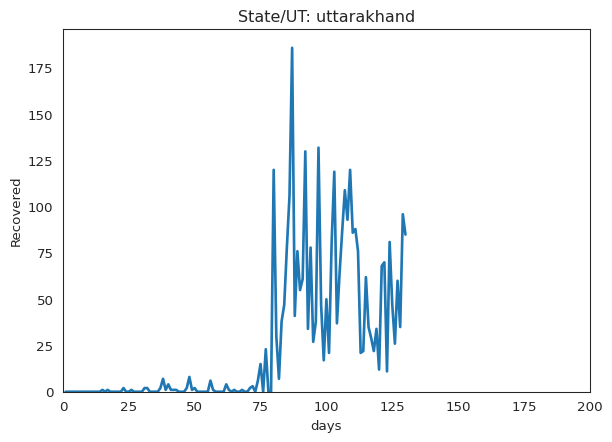

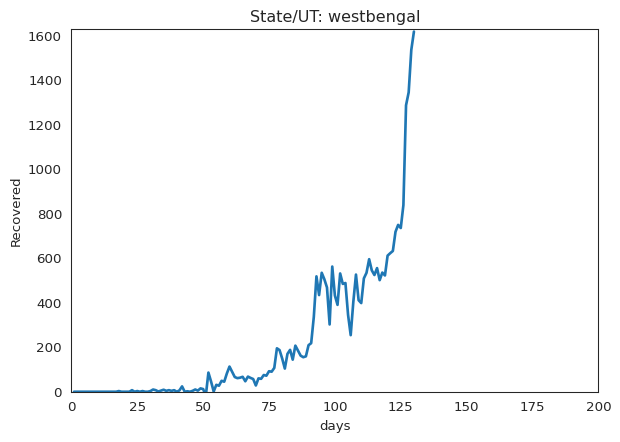

In [9]:
#Trend of Recovered Cases over the states/UT and India
data = fdata.query('Status == \'Recovered\'')
for i in statelist:
  if i=='UN':
    continue
  fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

  plt.plot(list(range(1,131)), data[i] ,  linewidth=2)
  y = max(data[i])


  
  plt.xlabel("days")
  plt.ylabel("Recovered")
  plt.title("State/UT: "+ st2dict[i] )
  plt.ylim(0,y + 10)
  plt.xlim(0, 200)


  filename='Recovered'+str(i)+'.png'
  plt.savefig(filename, dpi=48)
  plt.gca()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

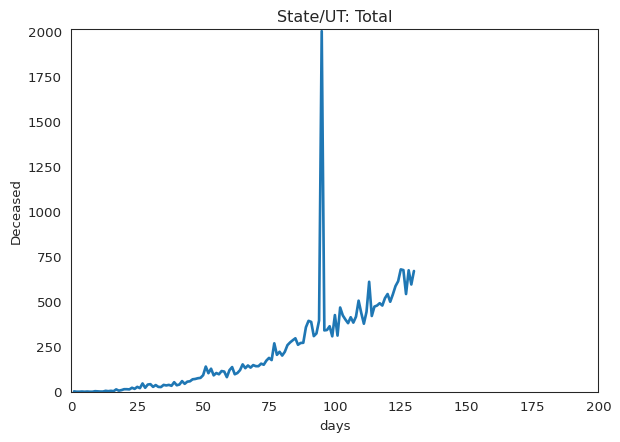

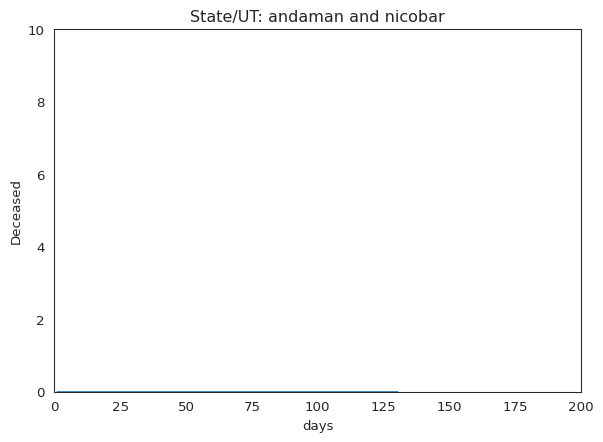

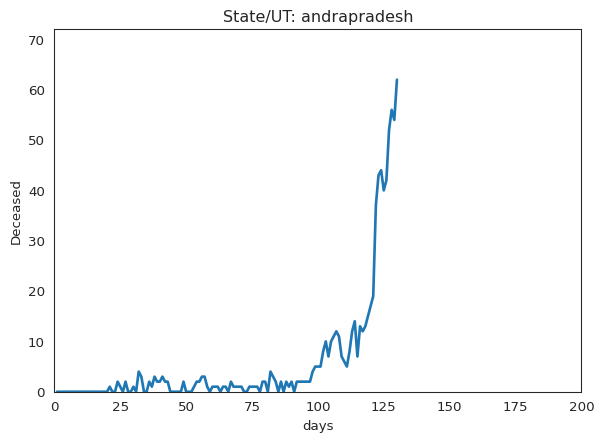

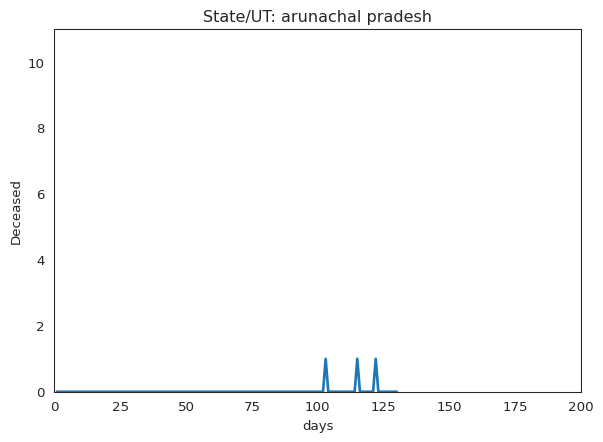

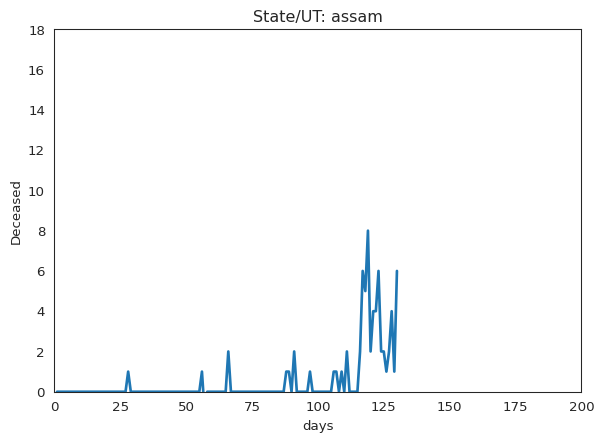

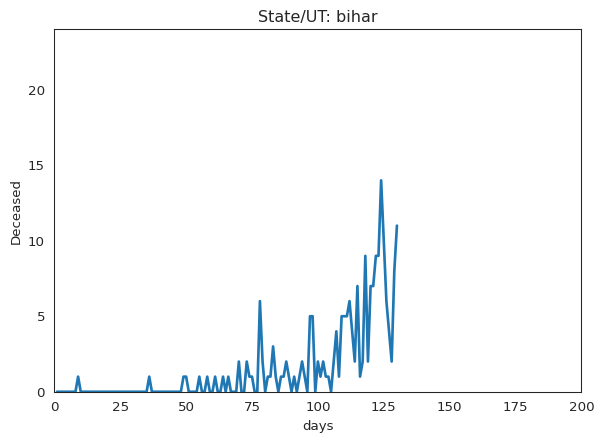

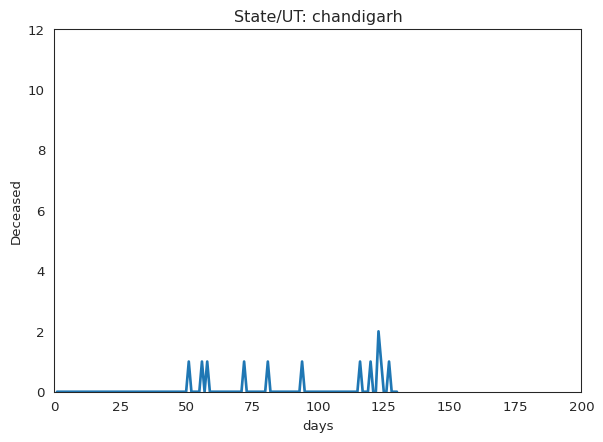

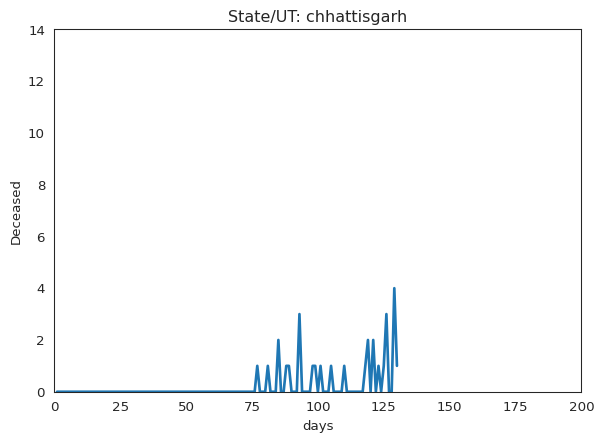

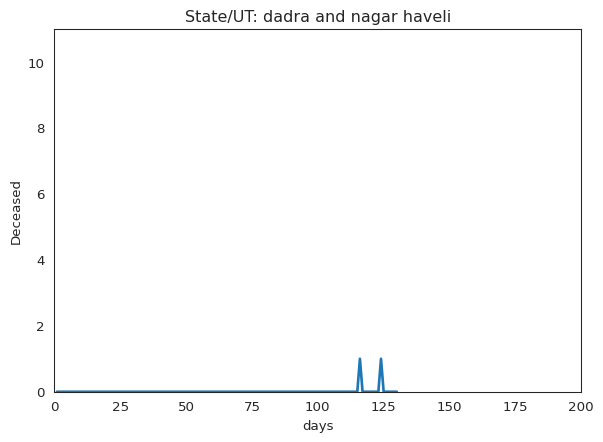

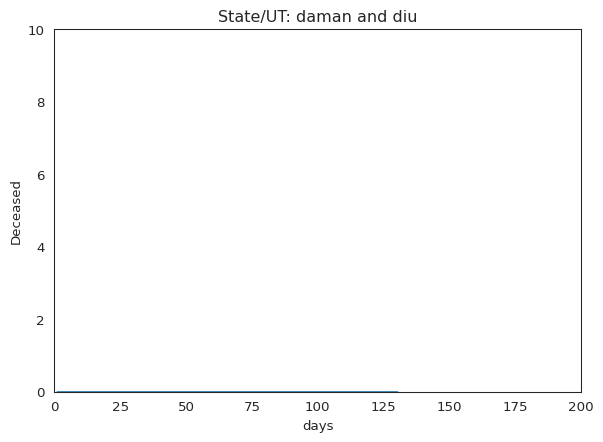

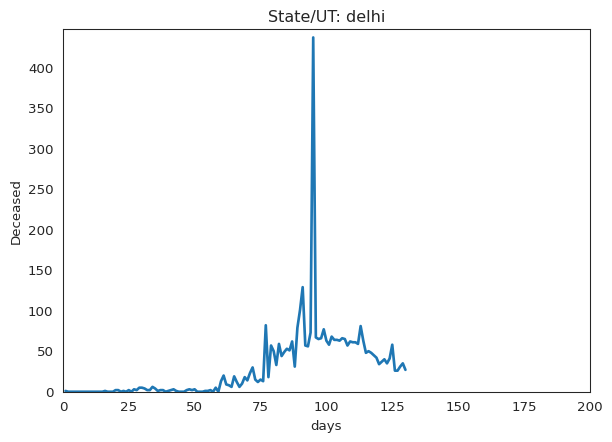

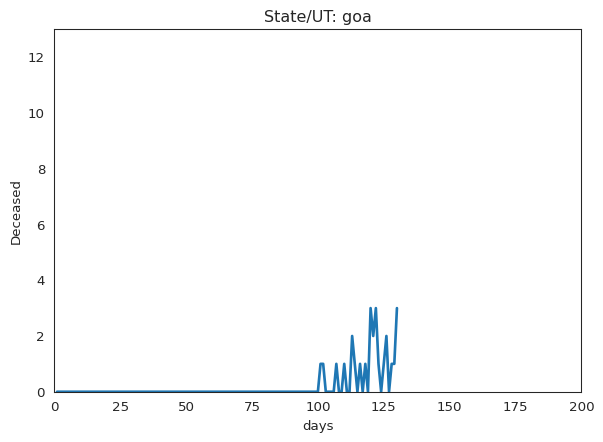

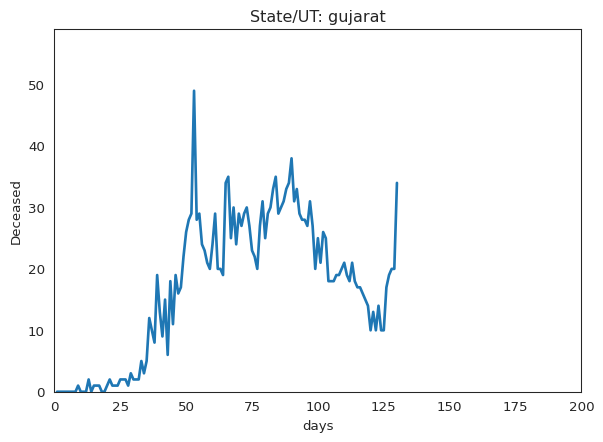

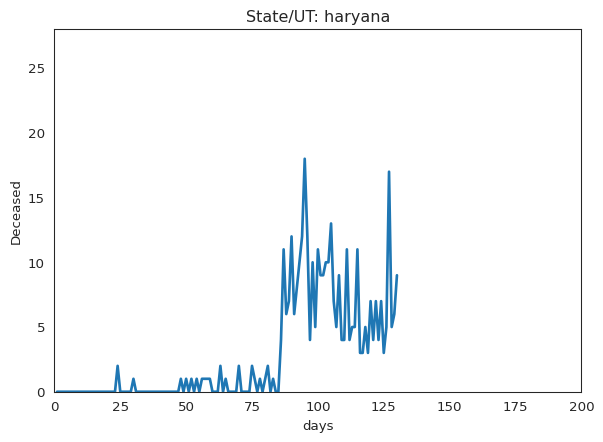

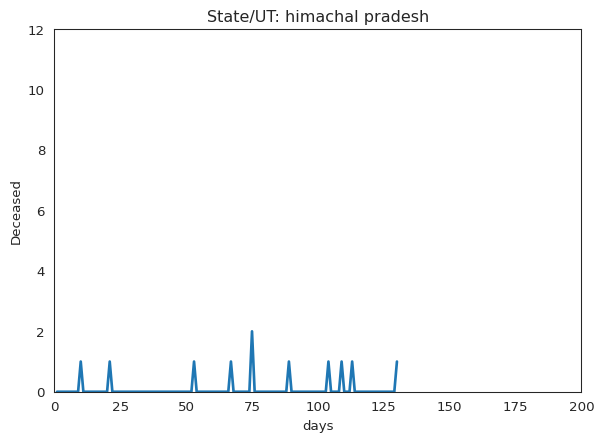

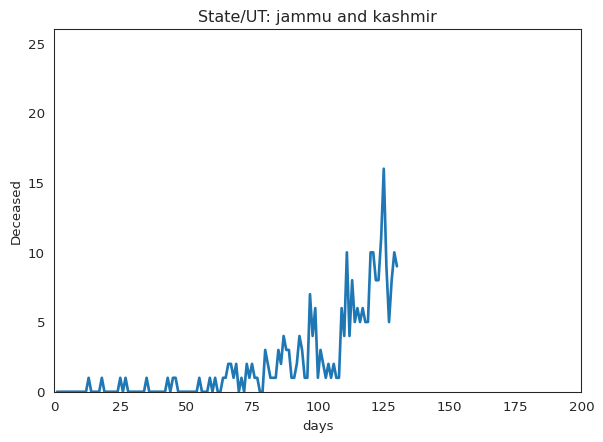

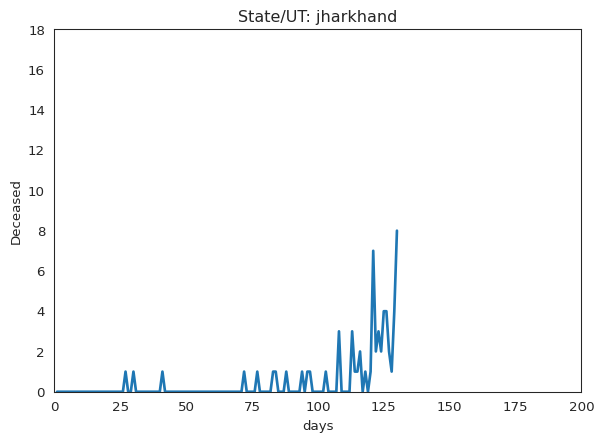

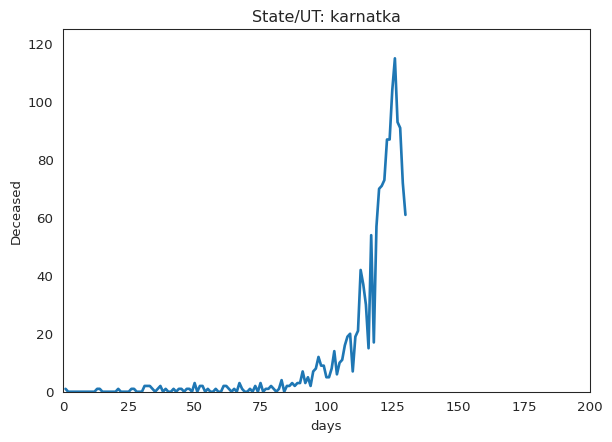

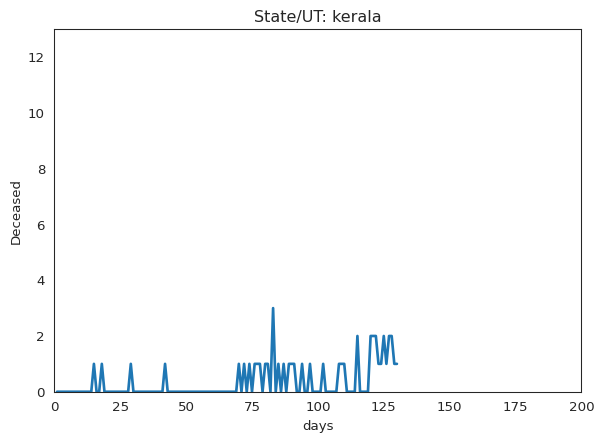

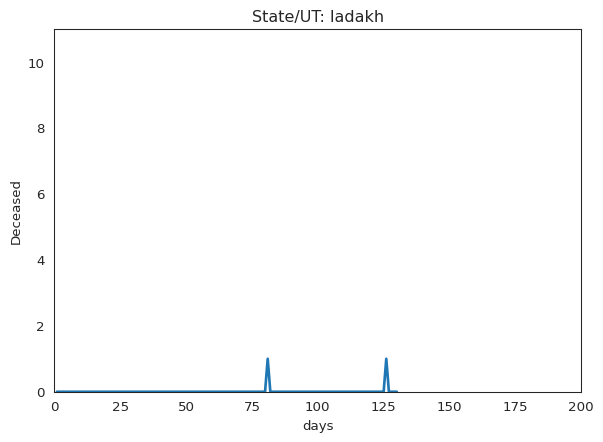

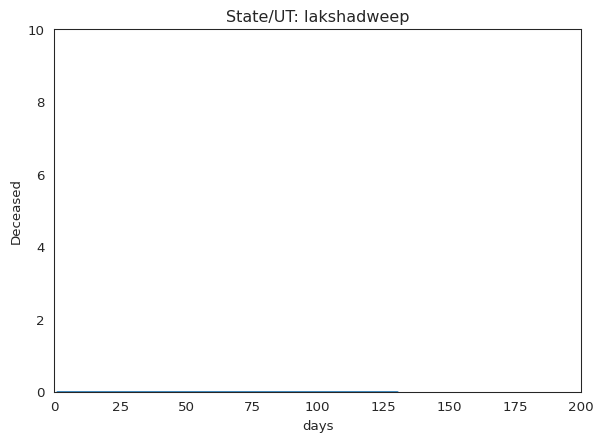

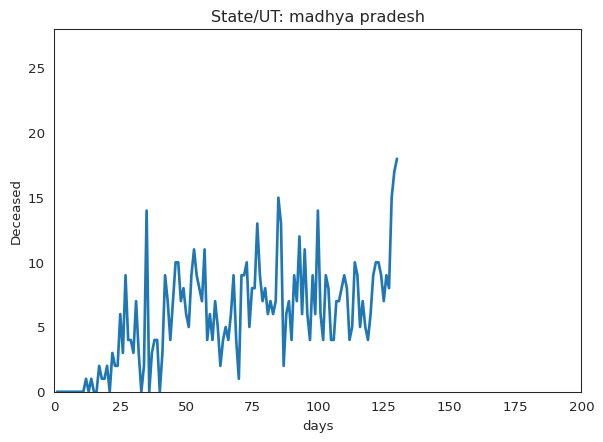

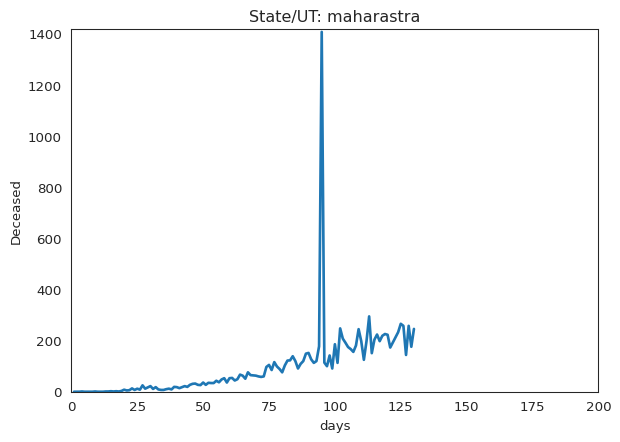

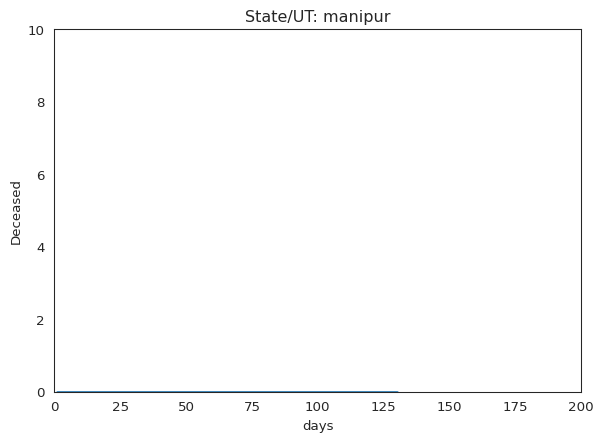

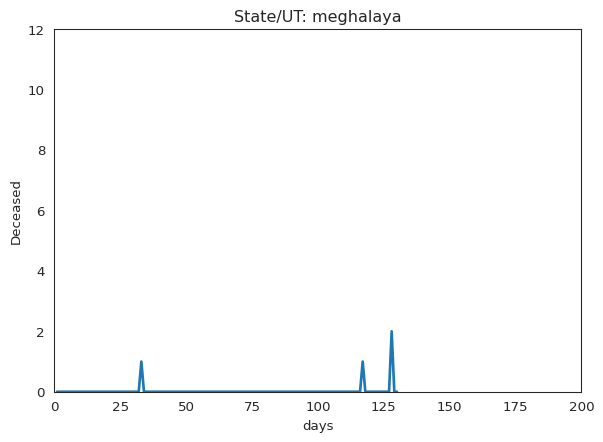

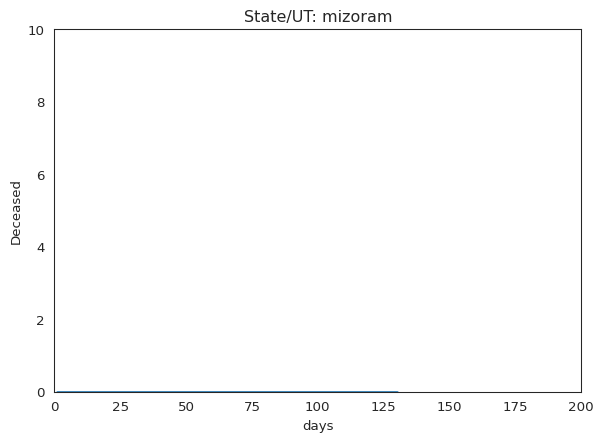

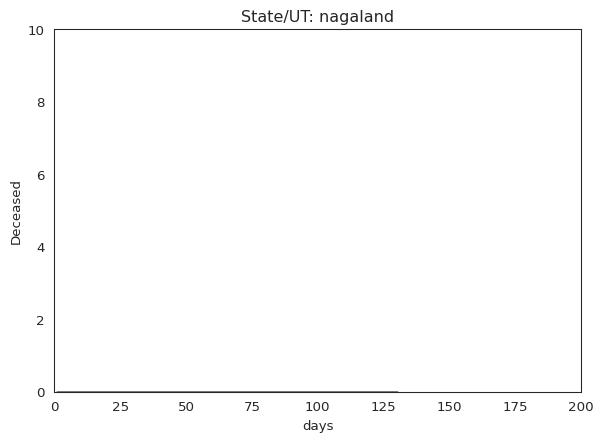

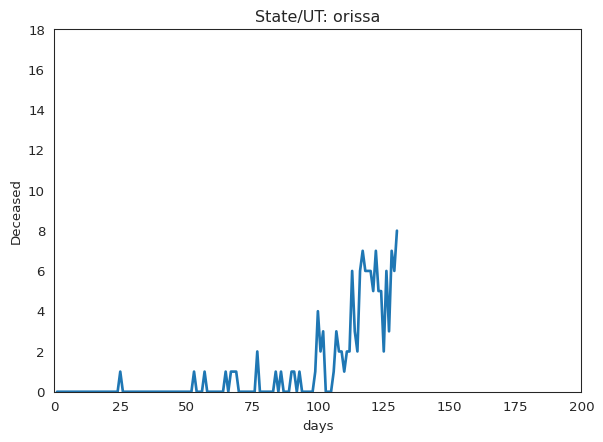

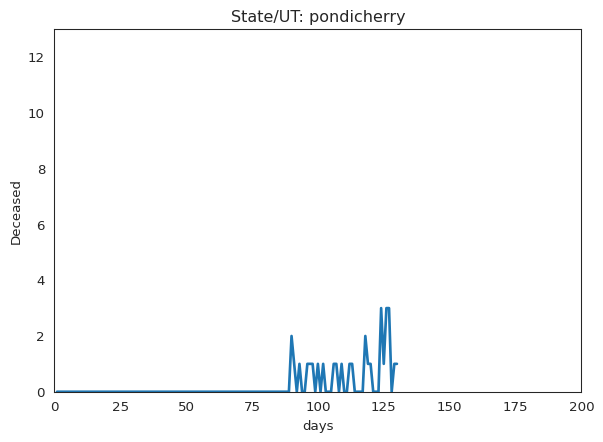

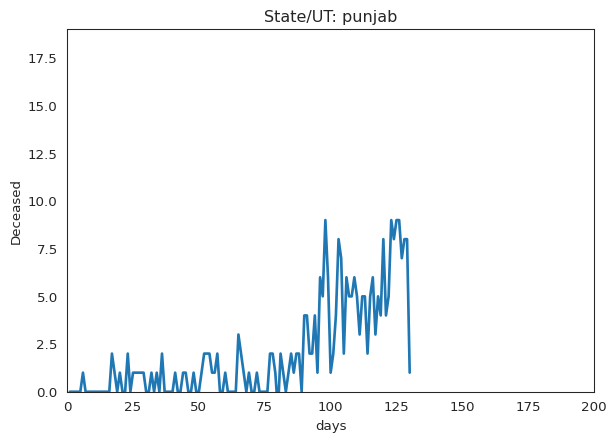

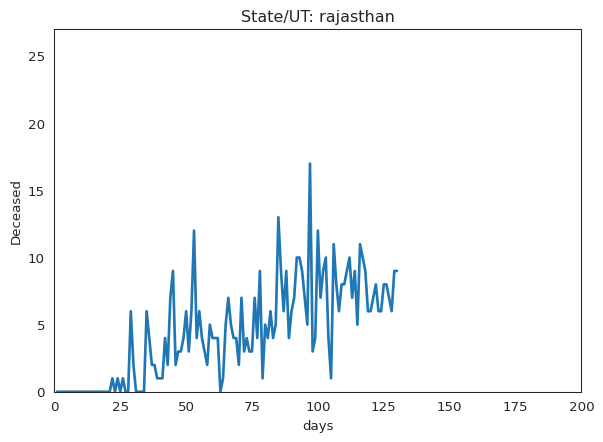

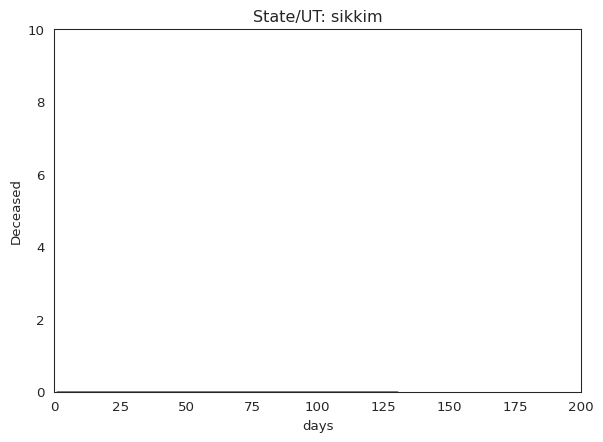

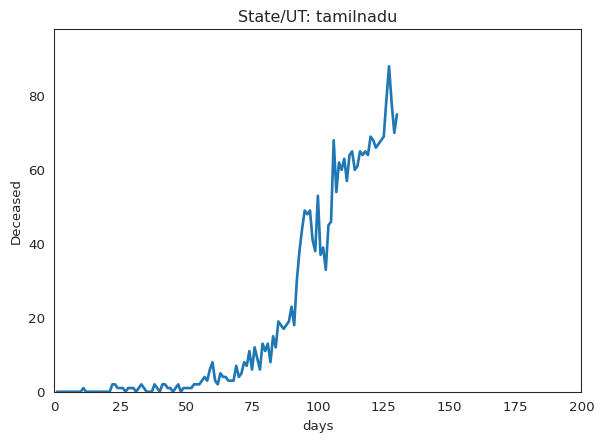

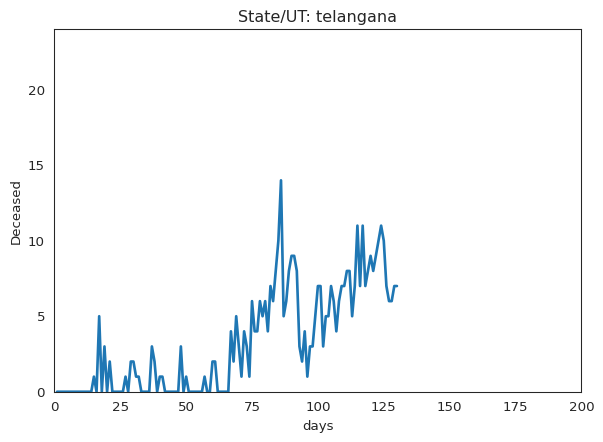

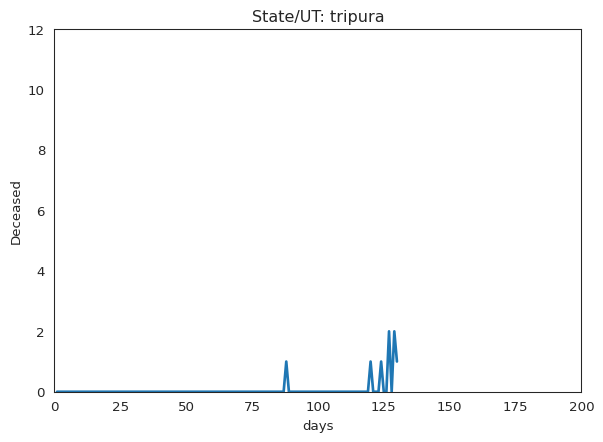

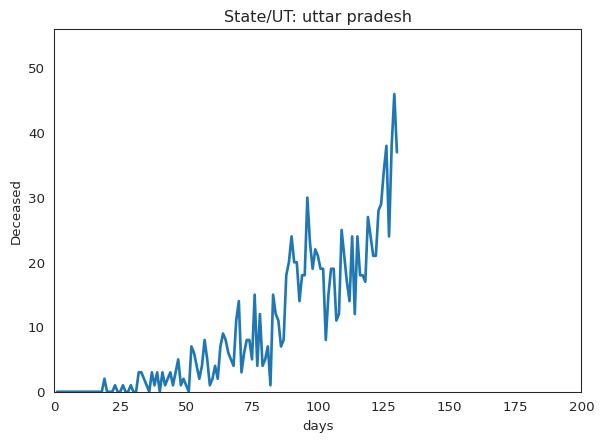

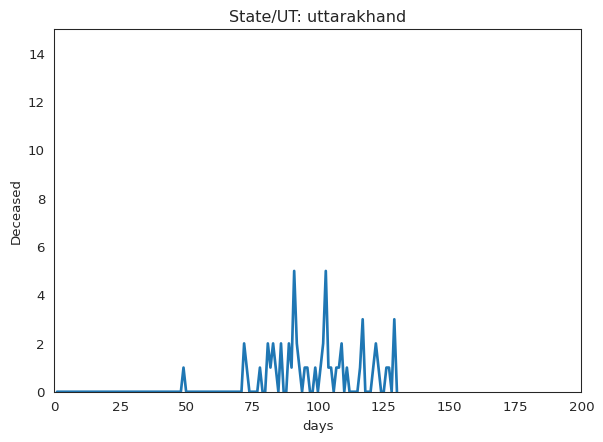

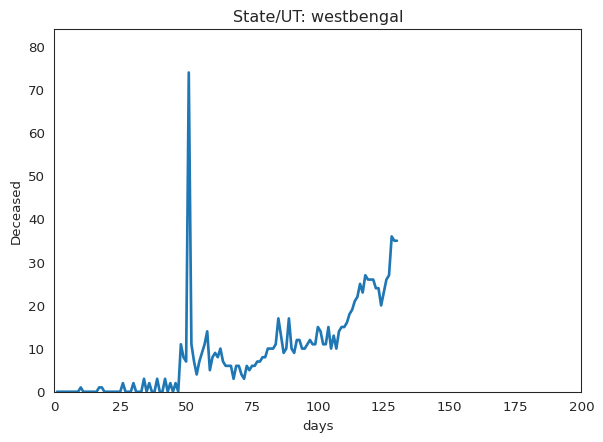

In [10]:
#Trend of Deceased Cases over the states/UT and India
data = fdata.query('Status == \'Deceased\'')
for i in statelist:
  if i=='UN':
    continue
  fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

  plt.plot(list(range(1,131)), data[i] ,  linewidth=2)
  y = max(data[i])


  
  plt.xlabel("days")
  plt.ylabel("Deceased")
  plt.title("State/UT: "+ st2dict[i] )
  plt.ylim(0,y + 10)
  plt.xlim(0, 200)


  filename='Deceased'+str(i)+'.png'
  plt.savefig(filename, dpi=48)
  plt.gca()
